In [12]:
!git clone https://huggingface.co/spaces/depth-anything/Depth-Anything-V2
!pip install -r Depth-Anything-V2/requirements.txt


fatal: destination path 'Depth-Anything-V2' already exists and is not an empty directory.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [13]:
!pip install numpy
!pip install matplotlib
!pip install datasets
!pip install torch
!pip install tqdm
!pip install requests
!pip install pillow



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [14]:
import cv2
import torch
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import datasets
from PIL import Image
import requests
from tqdm import tqdm
sys.path.append('./Depth-Anything-V2')
from depth_anything_v2.dpt import DepthAnythingV2

In [15]:
model = DepthAnythingV2(encoder='vits', features=64, out_channels=[48, 96, 192, 384])
model.load_state_dict(torch.load('checkpoints/depth_anything_v2_vits.pth', map_location='cpu'))
if torch.cuda.is_available():
    model = model.to('cuda')
model.eval()

DepthAnythingV2(
  (pretrained): DinoVisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 384, kernel_size=(14, 14), stride=(14, 14))
      (norm): Identity()
    )
    (blocks): ModuleList(
      (0-11): 12 x NestedTensorBlock(
        (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
        (attn): MemEffAttention(
          (qkv): Linear(in_features=384, out_features=1152, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=384, out_features=384, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): LayerScale()
        (drop_path1): Identity()
        (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=384, out_features=1536, bias=True)
          (act): GELU(approximate='none')
          (fc2): Linear(in_features=1536, out_features=384, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
    

In [16]:
raw_img = cv2.imread('Dataset1/im0.png')
depth = model.infer_image(raw_img)
#save to npy
np.save('depth_map_2.npy', depth)

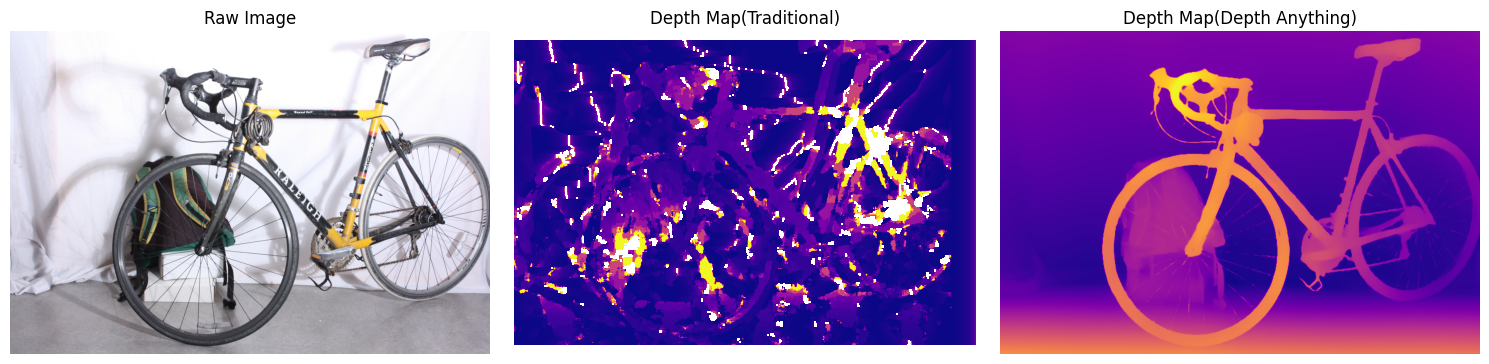

<Figure size 640x480 with 0 Axes>

In [17]:
img0 = cv2.imread('figs/im0.png')
img1 = cv2.imread('figs/im1.png')
img0_rgb = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)

depth = np.load('depth_map_1.npy')
depth2 = np.load('depth_map_2.npy')
depth = depth / 1000

# Create figure with two subplots side by side
plt.figure(figsize=(15, 5))

# Plot first image
plt.subplot(1, 3, 1)
plt.imshow(img0_rgb)
plt.axis('off')
plt.title('Raw Image')

# Plot second image
plt.subplot(1, 3, 2)
plt.imshow(depth, cmap='plasma')
plt.axis('off')
plt.title('Depth Map(Traditional)')

# Plot third image
plt.subplot(1, 3, 3)
plt.imshow(depth2, cmap='plasma')
plt.axis('off')
plt.title('Depth Map(Depth Anything)')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Optionally save the figure
plt.savefig('figs/combined_images.png')